# 0. Emission region

The emission region is the essential component of all the radiative processes.  
The only emission region currently considered in `agnpy` is a spherical plasmoid.    

In [1]:
import astropy.units as u
from astropy.coordinates import Distance
from agnpy.emission_regions import Blob
from agnpy.utils.plot import load_mpl_rc
import matplotlib.pyplot as plt

In [2]:
# set the spectrum normalisation (total energy in electrons in this case)
spectrum_norm = 1e48 * u.Unit("erg")

spectrum_pars = {"p": 2.8, "gamma_min": 1e2, "gamma_max": 1e7}
# define the spectral function parametrisation through a dictionary
spectrum_dict = {"type": "PowerLaw", "parameters": spectrum_pars}

# set the remaining quantities defining the blob
R_b = 1e16 * u.cm
B = 1 * u.G
z = Distance(1e27, unit=u.cm).z
delta_D = 10
Gamma = 10

blob = Blob(R_b, z, delta_D, Gamma, B, spectrum_norm, spectrum_dict)

In [3]:
print(blob)

* spherical emission region
 - R_b (radius of the blob): 1.00e+16 cm
 - V_b (volume of the blob): 4.19e+48 cm3
 - z (source redshift): 0.07
 - d_L (source luminosity distance):1.00e+27 cm
 - delta_D (blob Doppler factor): 1.00e+01
 - Gamma (blob Lorentz factor): 1.00e+01
 - Beta (blob relativistic velocity): 9.95e-01
 - theta_s (jet viewing angle): 5.74e+00 deg
 - B (magnetic field tangled to the jet): 1.00e+00 G
 - xi (coefficient for 1st order Fermi acceleration) : 1.00e+00
* electron spectrum
 - power law
 - k_e: 9.27e+06 1 / cm3
 - p: 2.80
 - gamma_min: 1.00e+02
 - gamma_max: 1.00e+07


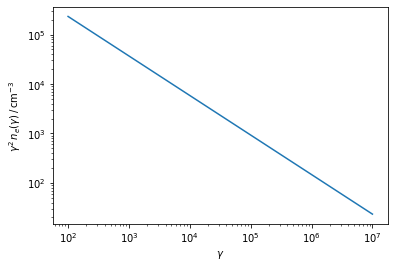

In [4]:
# plot the electron distribution
blob.plot_n_e(gamma_power=2)
plt.show()

In [5]:
blob.N_e_tot

<Quantity 5.43760421e+51>

In [6]:
blob.n_e_tot

<Quantity 1298.13238394 1 / cm3>

In [7]:
blob.P_jet_e

<Quantity 4.47434594e+44 erg / s>

In [8]:
blob.P_jet_B

<Quantity 7.45724324e+43 erg / s>

Try different normalisations

In [9]:
# set the spectrum normalisation (total energy in electrons in this case)
spectrum_norm = 1e2 * u.Unit("cm-3")

spectrum_pars = {
    "p": 2.3,
    "q": 0.1,
    "gamma_0": 1e4,
    "gamma_min": 10,
    "gamma_max": 1e7,
}

spectrum_dict = {"type": "LogParabola", "parameters": spectrum_pars}

In [10]:
blob_norm_diff = Blob(
    R_b, 
    z, 
    delta_D, 
    Gamma, 
    B, 
    spectrum_norm, 
    spectrum_dict, 
    spectrum_norm_type="differential"
)
blob_norm_int = Blob(
    R_b, 
    z, 
    delta_D, 
    Gamma, 
    B, 
    spectrum_norm, 
    spectrum_dict, 
    spectrum_norm_type="integral"
)

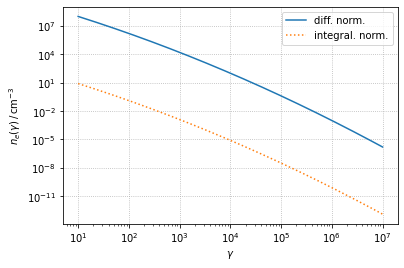

In [11]:
blob_norm_diff.plot_n_e(label="diff. norm.")
blob_norm_int.plot_n_e(label="integral. norm.", ls=":")
plt.legend()
plt.grid(ls=":")
plt.show()